In [1]:
import xgboost as xgb
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection  import cross_val_score

from scipy import stats
import seaborn as sns
from copy import deepcopy

%matplotlib inline

%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns',200) 

In [12]:
def read_data():
    data=pd.read_csv("train.csv")di
    return data
data=read_data()


In [36]:
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


读入了数据，接下来看看数据长啥样

In [21]:
data.describe(include="all")

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,294135.982561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,NaN,NaN,NaN,NaN,NaN,NaN,

因为这个Demo是学习xgboost用的，所以不用那么多。

In [92]:
train=data
cont_features = [cont for cont in list(train.select_dtypes(include=['float64','int64'])) ]
print('连续特征Continuous: {} features'.format(len(cont_features)))
data1=data[cont_features]
data1.describe()

连续特征Continuous: 16 features


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


取最后几列，拿xgboost来做回归问题。接下来我们看看拿来使用的数据大概长什么样吧！

In [93]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      188318 non-null  int64  
 1   cont1   188318 non-null  float64
 2   cont2   188318 non-null  float64
 3   cont3   188318 non-null  float64
 4   cont4   188318 non-null  float64
 5   cont5   188318 non-null  float64
 6   cont6   188318 non-null  float64
 7   cont7   188318 non-null  float64
 8   cont8   188318 non-null  float64
 9   cont9   188318 non-null  float64
 10  cont10  188318 non-null  float64
 11  cont11  188318 non-null  float64
 12  cont12  188318 non-null  float64
 13  cont13  188318 non-null  float64
 14  cont14  188318 non-null  float64
 15  loss    188318 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 23.0 MB


通过pandas的info()函数可以直观的看一看不同特征的数据与类型，再研究一下怎么去处理。

No handles with labels found to put in legend.


train['id']个数: 188318


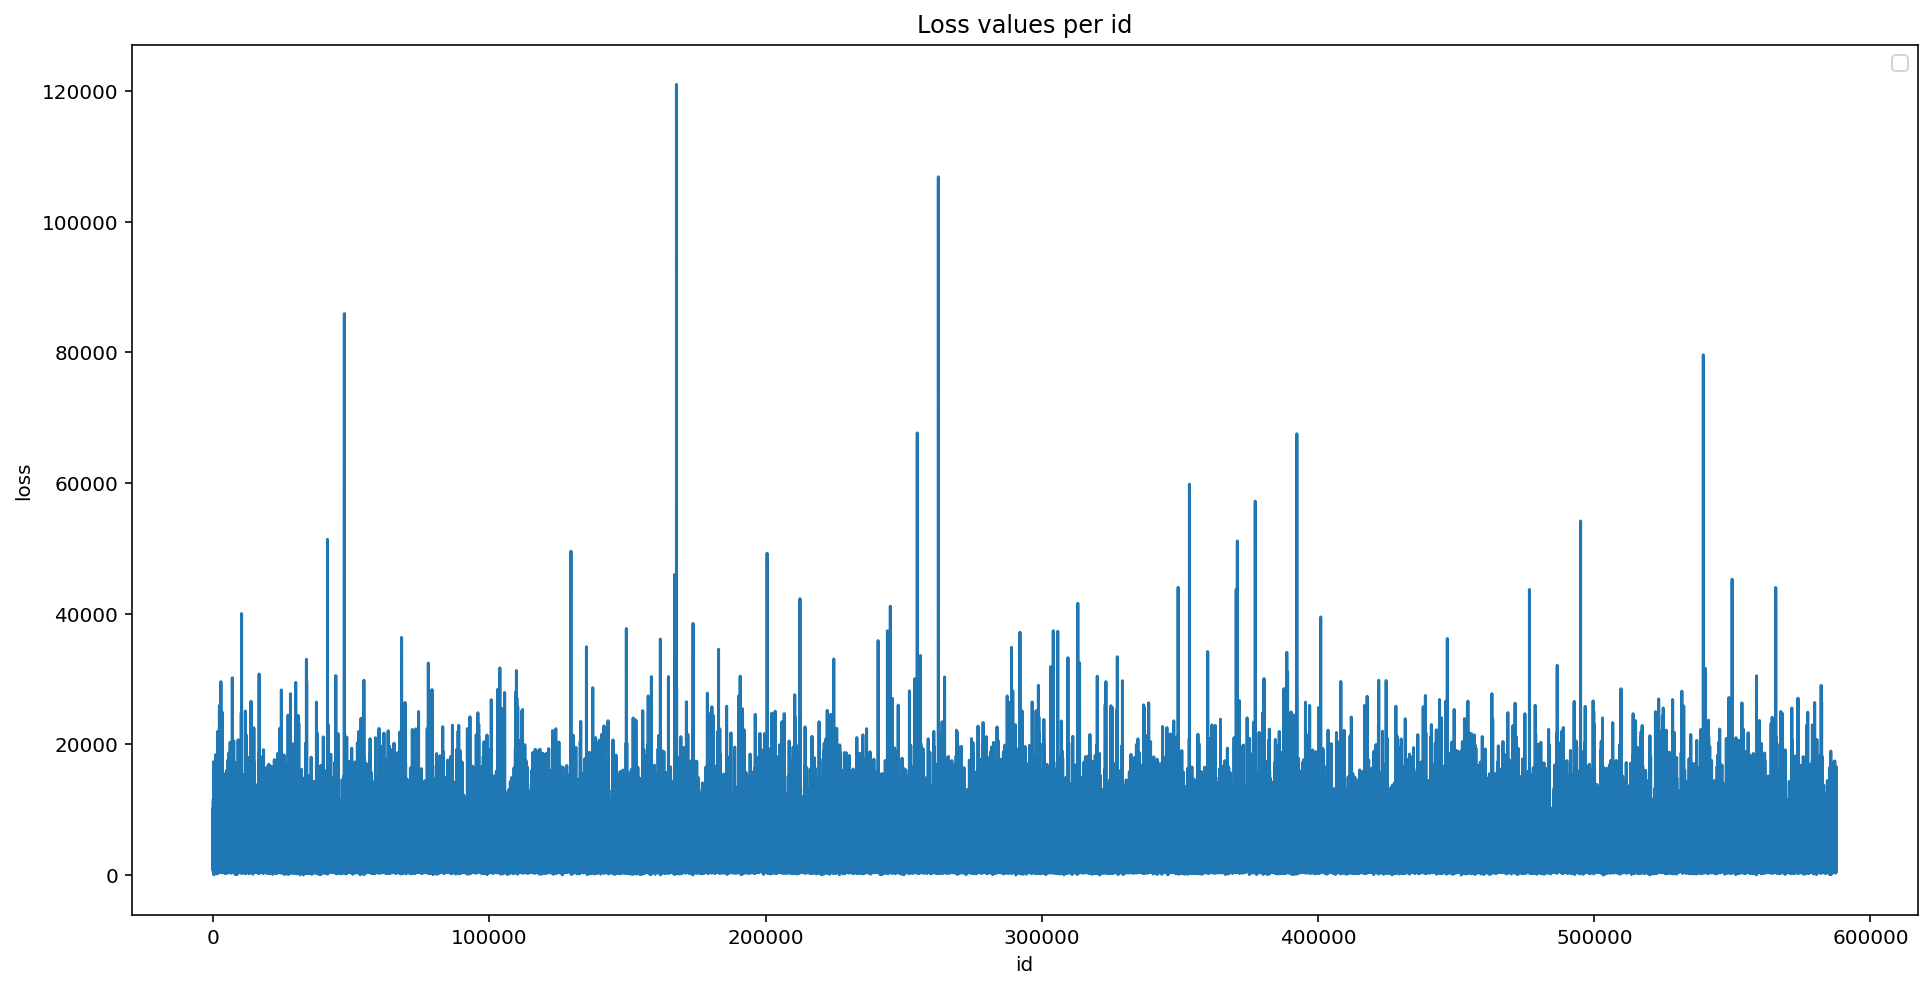

In [94]:
def plotdata(train):
    plt.figure(figsize=(16,8))
    plt.plot(train['id'],train['loss'])
    print('train[\'id\']个数:',len(train['id']))
    plt.title('Loss values per id')
    plt.xlabel('id')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
plotdata(data1)

ic| stats.mstats.skew(train['loss']).data: array(3.79492815)
ic| stats.mstats.skew(np.log(train['loss'])).data: array(0.0929738)


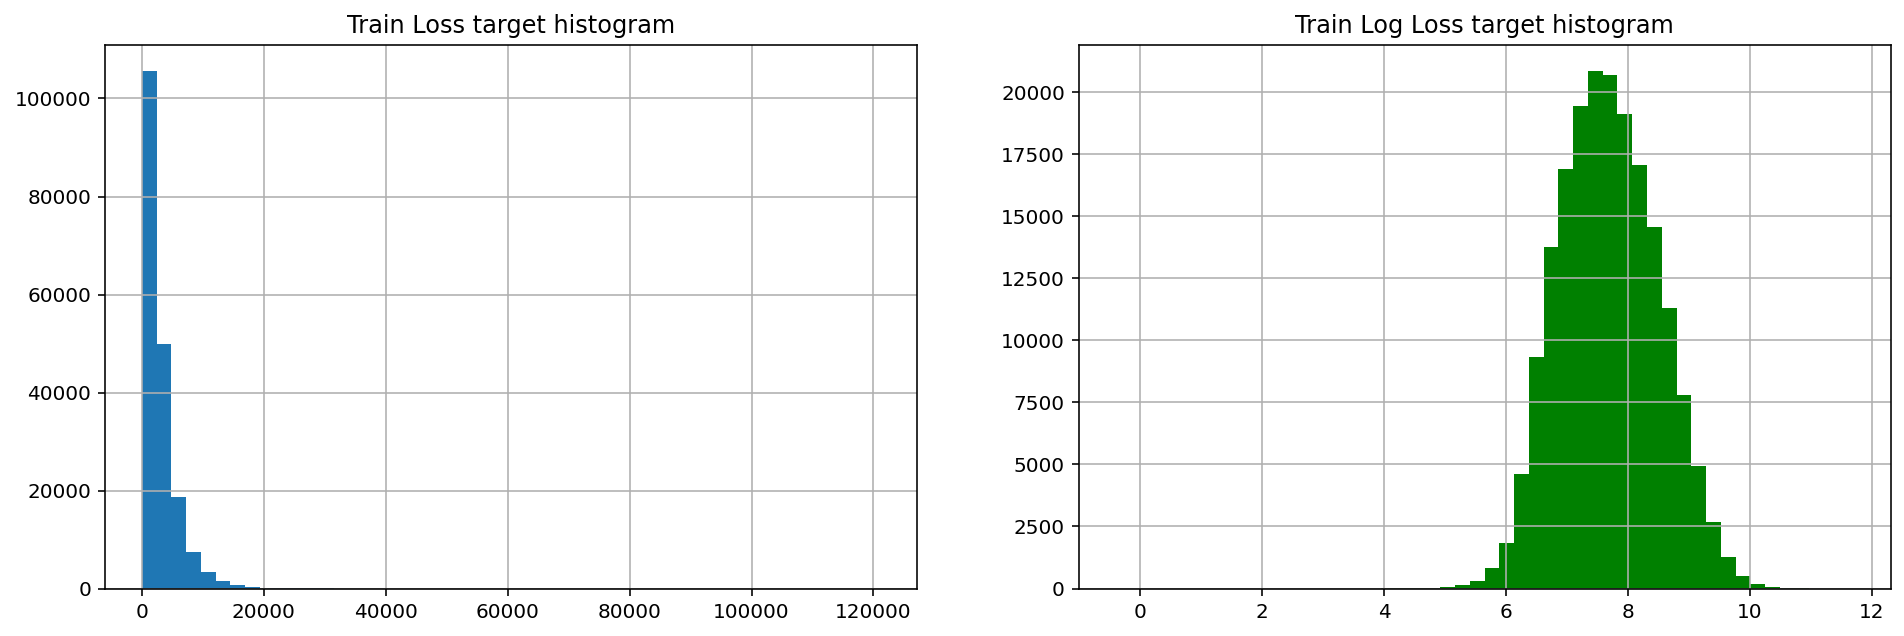

In [95]:
def analysis(train):
    ic(stats.mstats.skew(train['loss']).data)
    ic(stats.mstats.skew(np.log(train['loss'])).data)
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(16,5)
    ax1.hist(train['loss'], bins=50)
    ax1.set_title('Train Loss target histogram')
    ax1.grid(True)
    ax2.hist(np.log(train['loss']), bins=50, color='g')
    ax2.set_title("Train Log Loss target histogram")
    ax2.grid(True)
    plt.show()
    
analysis(data1)

显然，转换成对数之后，整体的偏度小了很多，这里也有启示，模型能更好的学到呈正态分布的结果，对于某些离群值模型是十分难拟合的，因此对于Object，也可以采用对数变换等方法平滑化数据。


array([[<AxesSubplot:title={'center':'cont1'}>,
        <AxesSubplot:title={'center':'cont2'}>,
        <AxesSubplot:title={'center':'cont3'}>,
        <AxesSubplot:title={'center':'cont4'}>],
       [<AxesSubplot:title={'center':'cont5'}>,
        <AxesSubplot:title={'center':'cont6'}>,
        <AxesSubplot:title={'center':'cont7'}>,
        <AxesSubplot:title={'center':'cont8'}>],
       [<AxesSubplot:title={'center':'cont9'}>,
        <AxesSubplot:title={'center':'cont10'}>,
        <AxesSubplot:title={'center':'cont11'}>,
        <AxesSubplot:title={'center':'cont12'}>],
       [<AxesSubplot:title={'center':'cont13'}>,
        <AxesSubplot:title={'center':'cont14'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

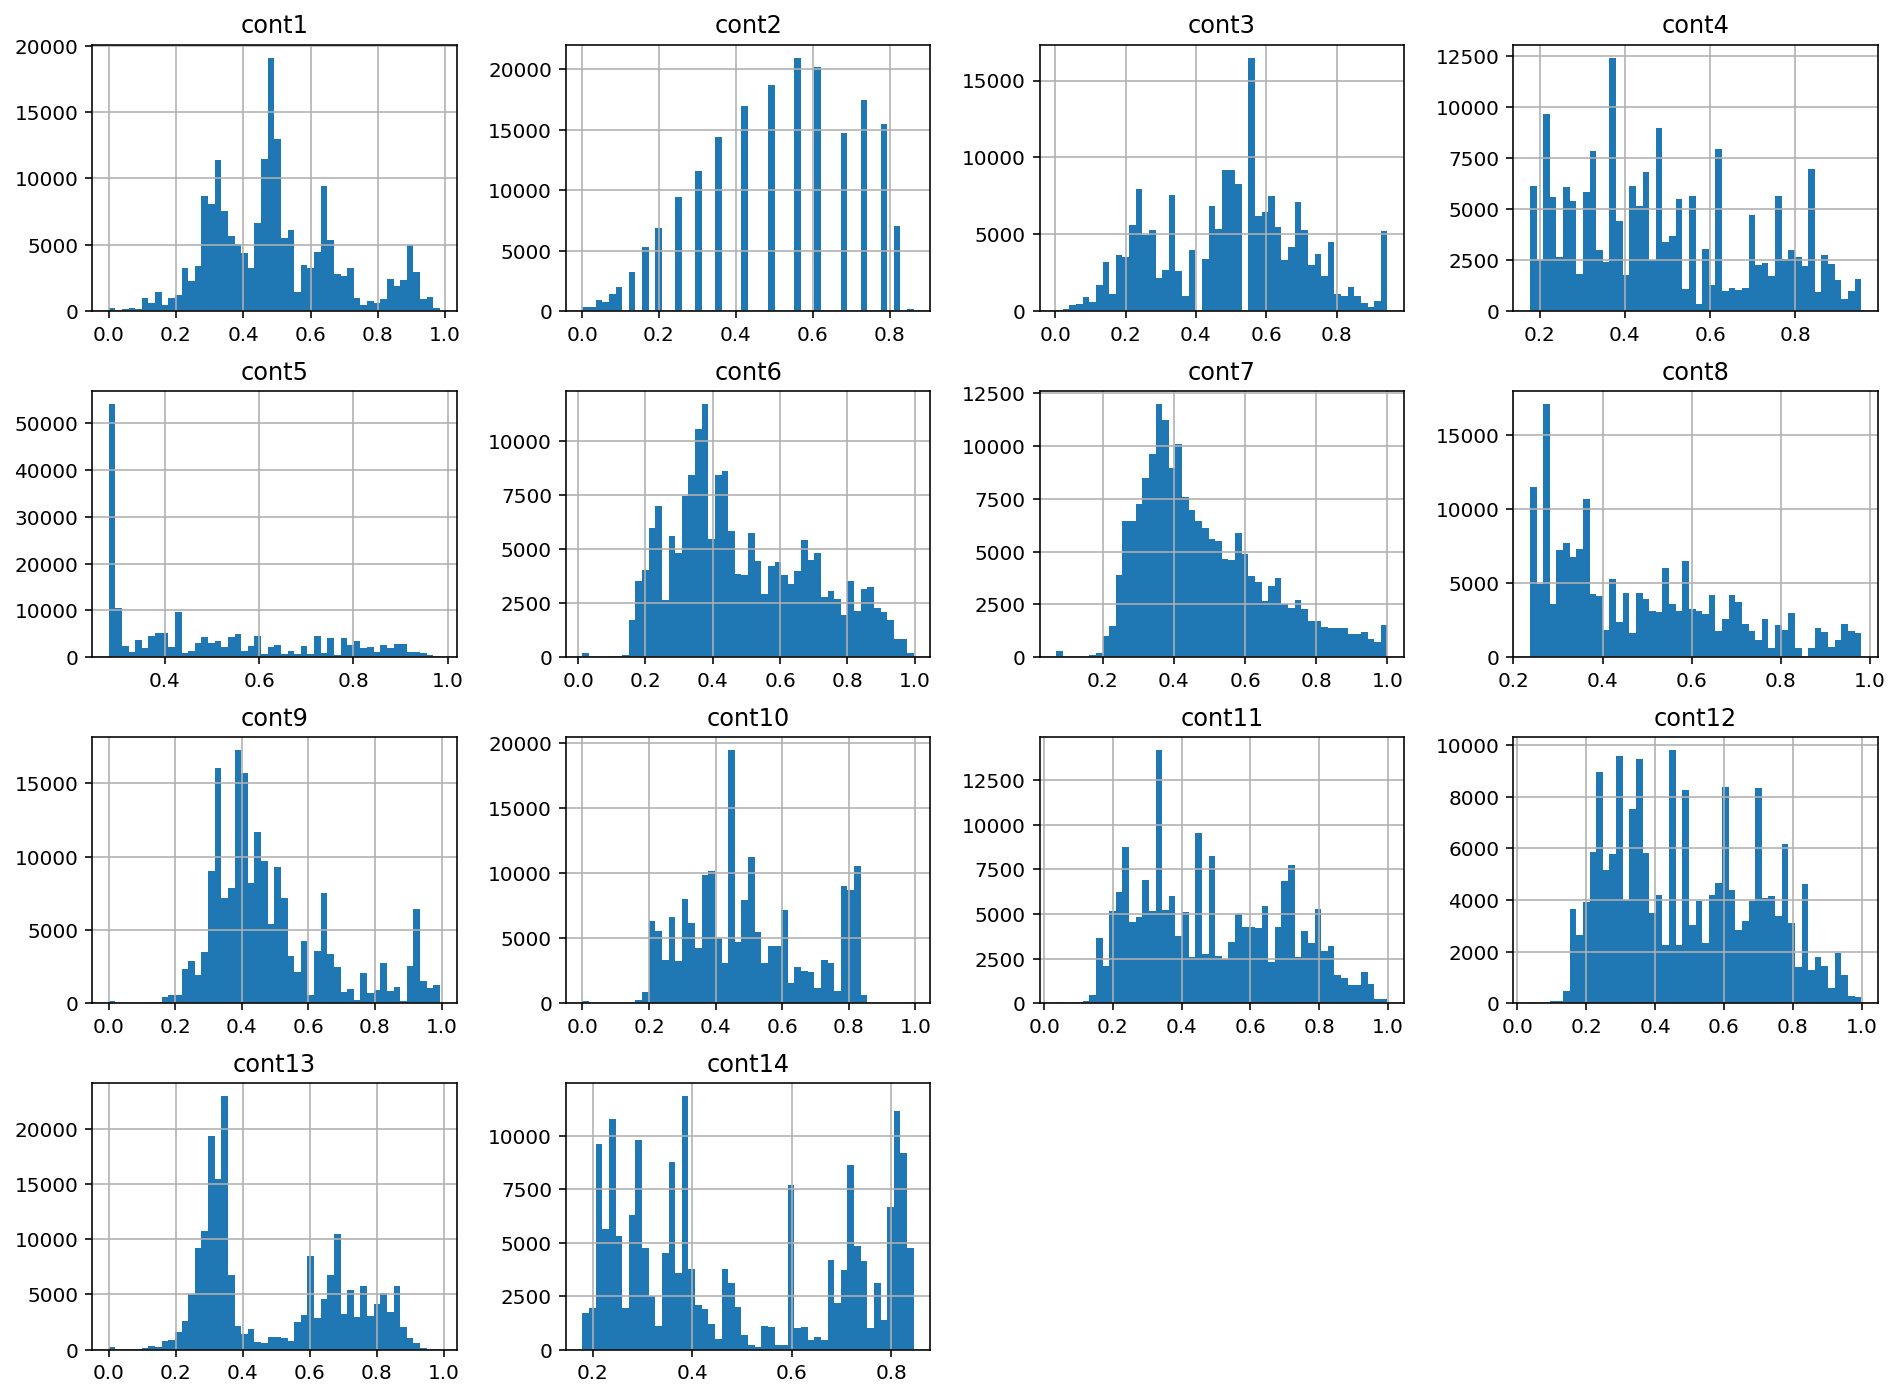

In [96]:
cont_features = [cont for cont in list(data1.select_dtypes(include=['float64','int64']))if cont not in ['id','loss'] ]

data1[cont_features].hist(bins=50,figsize=(16,12))

<AxesSubplot:>

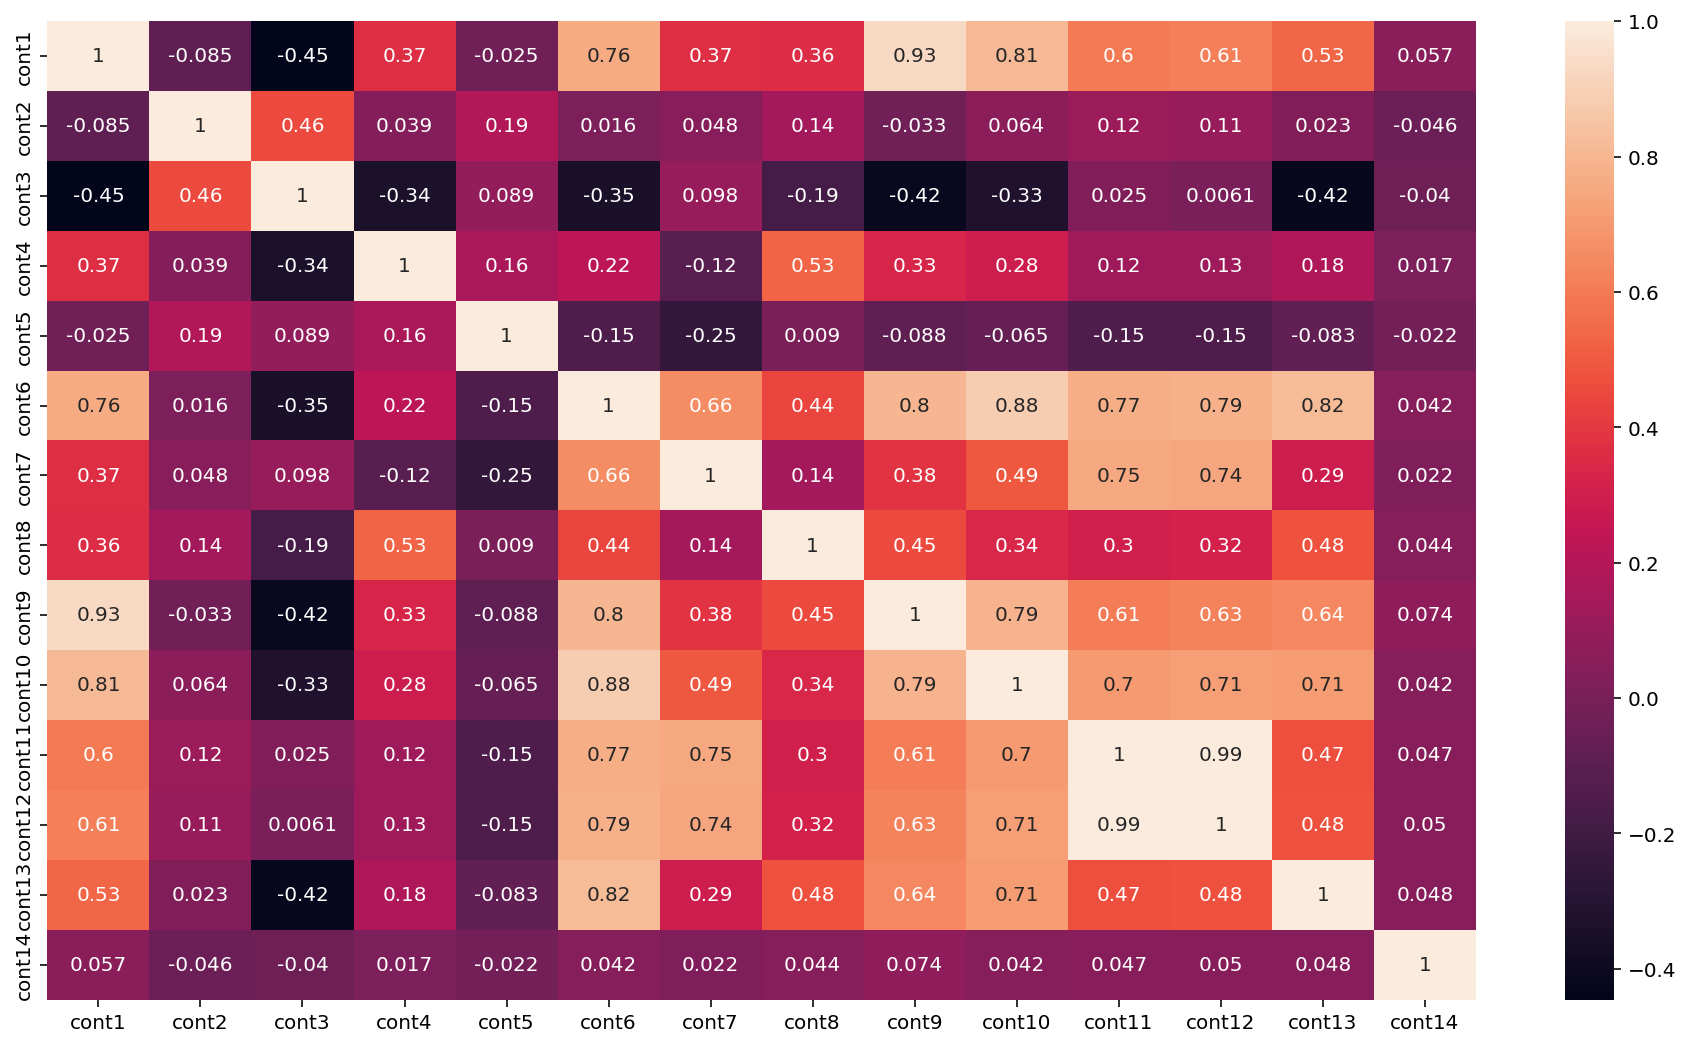

In [97]:
plt.subplots(figsize=(16,9))
correlation_mat = data1[cont_features].corr()
sns.heatmap(correlation_mat,annot=True)

接下来开始训练模型。

In [66]:
import pandas as pd 
import numpy as np
import xgboost as xgb
import pickle
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import KFold,train_test_split

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [98]:
data1.head()


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [100]:
data1['loss']=np.log(data1['loss'])
features = [x for x in data1.columns if x not in ['id','loss','log_loss']]
train_x=data1[features]
train_y=data1['loss']
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=0)##test_size测试集合所占比例


国际惯例，通过train_test_split来区分数据集和训练集，因为这个不是时间序列。所以random也没关系，从训练集中抽出了0.2的数据量来捣鼓了一下。

In [101]:
data1.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,7.685268
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,0.811868
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,-0.400478
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,7.093787
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,7.657080
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,8.259470
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,11.703647


In [102]:
ic(X_train.shape)
ic(y_train.shape)
ic(X_test.shape)
ic(y_test.shape)

ic| X_train.shape: (150654, 14)
ic| y_train.shape: (150654,)
ic| X_test.shape: (37664, 14)
ic| y_test.shape: (37664,)


(37664,)

In [112]:
dtrain=xgb.DMatrix(X_train,y_train)
dval=xgb.DMatrix(X_test,y_test)

In [2]:
params = {
    #基于树的模型，'gblinear':基于线性模型
    'booster':'gbtree',
    #最小孩子的子权重和，一棵新树的叶子结点样本和权重小于该值则拆分过程结束。
    #通过之前的describe可以发现，min=0,25%:1200,50%:2100,75:3800.
    'min_child_weight': 0.5,
    #为了防止过拟合，更新过程中用到的收缩步长。(这个不知道什么意思)
    #在每次提升计算之后，算法会直接获得新特征的权重。 eta通过缩减特征的权重使提升计算过程更加保守。
    'eta': 0.02,
    #在建立树时对特征采样的比例，缺省值为1（相当于dropout）——忽然感觉特征少的话，似乎也没啥。
    'colsample_bytree': 1,
    #'max_leaf_nodes':10 这个没什么卵用，跟最大深度是对偶的。如果xgboost生成二叉树，那么就是相对应的
    #一棵树的最大深度，总共也才14个特征，
    'max_depth': 8,
    #这参数限制每棵树权重改变的最大步长。如果这个参数的值为0，那就意味着没有约束。如果它被赋予了某个正值，那么它会让这个算法更加保守。 
    #通常，这个参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。 
    #这个参数一般用不到，但是你可以挖掘出来它更多的用处。
    'max_delta_step':0,
    #用于训练模型的子样本占整个样本集合的比例。如果设置为0.5则意味着XGBoost讲随机的整个样本集合中随机的
    #抽取出50%的子样本建立树模型，能够防止过拟合。
    'subsample': 0.7,
    #L1正则化项的权重
    'alpha': 1,
    #L2正则化项的权重
    'lambda':0,
    #minimum loss reduction required to make a further partition on a leaf node of the tree. 
    #the larger, the more conservative the algorithm will be.
    'gamma': 0.1,
    'silent': 1,
    #设置学习目标。‘reg:logistic'：逻辑回归；'binary:logistic'：二分类逻辑回归，输出为概率。
    #“binary:logitraw”–二分类的逻辑回归问题，输出的结果为wTx。
    #“count:poisson”–计数问题的poisson回归，输出结果为poisson分布。
    #在poisson回归中，max_delta_step的缺省值为0.7。(used to safeguard optimization)
    #“multi:softmax” –让XGBoost采用softmax目标函数处理多分类问题，同时需要设置参数num_class（类别个数
    #“multi:softprob” –和softmax一样，但是输出的是ndata * nclass的向量
    #可以将该向量reshape成ndata行nclass列的矩阵。每行数据表示样本所属于每个类别的概率。
    #“rank:pairwise”–set XGBoost to do ranking task by minimizing the pairwise loss
    #base_score [ default=0.5 ]
    'objective': 'reg:linear',
    'verbose_eval': True,
    'seed': 12
}
clf=xgb.train(params, dtrain, num_boost_round=200, evals=[(dtrain,'train'),(dval,'val')],#可能10棵树有点少
obj=None, feval=None, maximize=False, early_stopping_rounds=None, 
evals_result=None, verbose_eval=True, 
xgb_model=None, callbacks=None)


NameError: name 'dtrain' is not defined

总结笔记：xgboost的基本实现已经完成了，前面的数据处理和清洗部分还是要看看文档继续学习。
对于损失函数，目前还是逐步下降的，老师的要求是通过LSTM对序列进行建模，然后尝试找出不同树同Loss之间的关联？
如果要约减掉某棵树，那么应该将这棵树用其他树的函数模型表示出来。
。。
。。
